In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv("Telco Credit Score - train.csv")
data.sample(5)

,customerID,phoneNumber,age,gender,planType,tenure,numDeviceOwned,numOfCalls,totalCallDuration,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore,applicationResult
4563,67-2773976,843 844 0634,22,Female,Postpaid,6,1,47.0,7682.67,4.0,76.56,71.99,231.82,2.0,2.0,3,0
5247,23-5736818,849 565 9198,33,Female,Prepaid,23,1,143.0,8756.98,8.0,58.23,66.40,2882.00,2.0,1.0,2,0
1627,70-7033883,881 317 5679,38,Male,Postpaid,62,1,103.0,3529.04,6.0,33.95,104.15,204.28,NaN,1.0,74,1
824,87-0975712,220 998 9167,29,Female,Prepaid,60,1,126.0,3699.99,91.0,161.26,107.13,2864.56,NaN,NaN,76,1
6153,51-5854432,624 504 7499,29,Female,Postpaid,55,3,127.0,9244.13,51.0,98.91,63.83,1133.31,NaN,1.0,48,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           10000 non-null  object 
 1   phoneNumber          10000 non-null  object 
 2   age                  10000 non-null  int64  
 3   gender               10000 non-null  object 
 4   planType             10000 non-null  object 
 5   tenure               10000 non-null  int64  
 6   numDeviceOwned       10000 non-null  int64  
 7   numOfCalls           9998 non-null   float64
 8   totalCallDuration    9998 non-null   float64
 9   numOfSMS             9998 non-null   float64
 10  dataUsage            9998 non-null   float64
 11  prevMonthlyFee       10000 non-null  float64
 12  totalFee             9998 non-null   float64
 13  countOverduePayment  5113 non-null   float64
 14  countBarSuspend      4594 non-null   float64
 15  creditScore          10000 non-null  

In [4]:
data.drop('customerID',axis='columns',inplace=True)
data.drop('phoneNumber',axis='columns',inplace=True)
data.drop('gender',axis='columns',inplace=True)
data.drop('totalCallDuration',axis='columns',inplace=True)
data.dtypes

age                      int64
planType                object
tenure                   int64
numDeviceOwned           int64
numOfCalls             float64
numOfSMS               float64
dataUsage              float64
prevMonthlyFee         float64
totalFee               float64
countOverduePayment    float64
countBarSuspend        float64
creditScore              int64
applicationResult        int64
dtype: object

In [5]:
data['planType'].replace({'Postpaid':1,'Prepaid':0},inplace=True)

data.planType.unique()

array([0, 1], dtype=int64)

In [6]:
data.sample(5)

,age,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore,applicationResult
4230,19,0,88,1,190.0,27.0,194.10,44.70,1143.65,3.0,NaN,32,0
8762,20,0,18,2,56.0,81.0,24.15,97.57,1203.53,1.0,1.0,41,0
3226,20,0,133,2,20.0,165.0,145.87,74.77,3085.29,2.0,1.0,73,1
8903,26,0,21,2,16.0,65.0,39.21,74.81,2619.55,2.0,3.0,6,0
9695,43,1,142,3,136.0,66.0,137.48,106.46,3035.80,1.0,NaN,44,0


In [7]:
# count null in datasets
data.isnull().sum()

age                       0
planType                  0
tenure                    0
numDeviceOwned            0
numOfCalls                2
numOfSMS                  2
dataUsage                 2
prevMonthlyFee            0
totalFee                  2
countOverduePayment    4887
countBarSuspend        5406
creditScore               0
applicationResult         0
dtype: int64

In [8]:
# fill null with 0 for count
data[['countOverduePayment', 'countBarSuspend']] = data[['countOverduePayment', 'countBarSuspend']].fillna(0)
data.isnull().sum()

age                    0
planType               0
tenure                 0
numDeviceOwned         0
numOfCalls             2
numOfSMS               2
dataUsage              2
prevMonthlyFee         0
totalFee               2
countOverduePayment    0
countBarSuspend        0
creditScore            0
applicationResult      0
dtype: int64

In [9]:
# drop all rows with any NaN and NaT values
data = data.dropna(how='any',axis=0)
data

,age,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore,applicationResult
0,65,0,70,1,126.0,25.0,160.03,91.96,2906.97,0.0,2.0,29,0
1,52,1,56,2,31.0,198.0,108.60,64.51,1364.46,1.0,2.0,38,0
2,39,1,92,1,82.0,7.0,101.20,62.25,937.86,2.0,1.0,76,1
3,25,1,25,1,200.0,58.0,42.57,86.23,3460.13,0.0,0.0,72,1
4,29,1,25,1,92.0,123.0,21.95,79.88,3074.00,1.0,1.0,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55,1,199,3,98.0,45.0,161.81,78.51,3549.30,0.0,2.0,21,0
9996,28,1,199,3,70.0,10.0,148.72,98.48,947.97,1.0,0.0,9,0
9997,43,1,199,3,53.0,12.0,86.19,33.62,2231.31,2.0,0.0,48,0
9998,40,1,199,3,59.0,135.0,87.08,37.81,1694.29,1.0,2.0,34,0


In [10]:
data.isnull().sum()

age                    0
planType               0
tenure                 0
numDeviceOwned         0
numOfCalls             0
numOfSMS               0
dataUsage              0
prevMonthlyFee         0
totalFee               0
countOverduePayment    0
countBarSuspend        0
creditScore            0
applicationResult      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9998 non-null   int64  
 1   planType             9998 non-null   int64  
 2   tenure               9998 non-null   int64  
 3   numDeviceOwned       9998 non-null   int64  
 4   numOfCalls           9998 non-null   float64
 5   numOfSMS             9998 non-null   float64
 6   dataUsage            9998 non-null   float64
 7   prevMonthlyFee       9998 non-null   float64
 8   totalFee             9998 non-null   float64
 9   countOverduePayment  9998 non-null   float64
 10  countBarSuspend      9998 non-null   float64
 11  creditScore          9998 non-null   int64  
 12  applicationResult    9998 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 1.1 MB


In [12]:
# scaling: value for tenure, MonthlyCharges and TotalCharges are not in 1 or 0 range
# thus use minmaxscaler

cols_to_scale = ['age', 'tenure', 'numDeviceOwned', 'numOfCalls', 'numOfSMS', 'dataUsage','prevMonthlyFee','totalFee','countOverduePayment', 
                 'countBarSuspend', 'creditScore']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [14]:
for col in data:
    print(f'{col}: {data[col].unique()}')

age: [0.8245614  0.59649123 0.36842105 0.12280702 0.19298246 0.05263158
 0.42105263 0.43859649 0.         0.14035088 0.28070175 0.33333333
 0.03508772 0.31578947 0.24561404 0.45614035 0.26315789 0.07017544
 0.29824561 0.40350877 0.15789474 0.35087719 0.21052632 0.1754386
 0.0877193  0.47368421 0.01754386 0.22807018 0.10526316 0.38596491
 0.52631579 0.49122807 0.56140351 0.50877193 0.54385965 0.77192982
 0.70175439 0.61403509 0.68421053 0.63157895 0.57894737 0.80701754
 0.66666667 0.78947368 0.64912281 0.71929825 0.75438596 0.73684211
 0.85964912 0.89473684 0.92982456 0.96491228 0.94736842 0.9122807
 1.         0.98245614 0.87719298 0.84210526]
planType: [0 1]
tenure: [0.34848485 0.27777778 0.45959596 0.12121212 0.12626263 0.13131313
 0.13636364 0.14141414 0.14646465 0.15151515 0.15656566 0.16161616
 0.16666667 0.17171717 0.17676768 0.18181818 0.18686869 0.19191919
 0.1969697  0.2020202  0.20707071 0.21212121 0.21717172 0.22222222
 0.22727273 0.23232323 0.23737374 0.24242424 0.24747475 

In [15]:
data

,age,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore,applicationResult
0,0.824561,0,0.348485,0.0,0.628141,0.120603,0.799296,0.774597,0.805988,0.000000,0.666667,0.282828,0
1,0.596491,1,0.277778,0.5,0.150754,0.989950,0.540789,0.431429,0.373797,0.333333,0.666667,0.373737,0
2,0.368421,1,0.459596,0.0,0.407035,0.030151,0.503594,0.403175,0.254269,0.666667,0.333333,0.757576,1
3,0.122807,1,0.121212,0.0,1.000000,0.286432,0.208897,0.702963,0.960976,0.000000,0.000000,0.717172,1
4,0.192982,1,0.121212,0.0,0.457286,0.613065,0.105253,0.623578,0.852787,0.333333,0.333333,0.585859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.649123,1,1.000000,1.0,0.487437,0.221106,0.808243,0.606451,0.985960,0.000000,0.666667,0.202020,0
9996,0.175439,1,1.000000,1.0,0.346734,0.045226,0.742448,0.856107,0.257102,0.333333,0.000000,0.080808,0
9997,0.438596,1,1.000000,1.0,0.261307,0.055276,0.428148,0.045256,0.616677,0.666667,0.000000,0.474747,0
9998,0.385965,1,1.000000,1.0,0.291457,0.673367,0.432621,0.097637,0.466211,0.333333,0.666667,0.333333,0


In [16]:
# variable input
x_train = data.drop('applicationResult',axis='columns')

In [17]:
x_train

,age,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore
0,0.824561,0,0.348485,0.0,0.628141,0.120603,0.799296,0.774597,0.805988,0.000000,0.666667,0.282828
1,0.596491,1,0.277778,0.5,0.150754,0.989950,0.540789,0.431429,0.373797,0.333333,0.666667,0.373737
2,0.368421,1,0.459596,0.0,0.407035,0.030151,0.503594,0.403175,0.254269,0.666667,0.333333,0.757576
3,0.122807,1,0.121212,0.0,1.000000,0.286432,0.208897,0.702963,0.960976,0.000000,0.000000,0.717172
4,0.192982,1,0.121212,0.0,0.457286,0.613065,0.105253,0.623578,0.852787,0.333333,0.333333,0.585859
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.649123,1,1.000000,1.0,0.487437,0.221106,0.808243,0.606451,0.985960,0.000000,0.666667,0.202020
9996,0.175439,1,1.000000,1.0,0.346734,0.045226,0.742448,0.856107,0.257102,0.333333,0.000000,0.080808
9997,0.438596,1,1.000000,1.0,0.261307,0.055276,0.428148,0.045256,0.616677,0.666667,0.000000,0.474747
9998,0.385965,1,1.000000,1.0,0.291457,0.673367,0.432621,0.097637,0.466211,0.333333,0.666667,0.333333


In [18]:
x_train.shape

(9998, 12)

In [19]:
# output
y_train = data['applicationResult']
y_train.shape

(9998,)

In [20]:
import tensorflow as tf
from tensorflow import keras

# enter layer
# first layer: use 12 variables/neurons
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500)



Epoch 1/500
313/313 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8084
Epoch 2/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9758
Epoch 3/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9835
Epoch 4/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9887
Epoch 5/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9901
Epoch 6/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9919
Epoch 7/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9936
Epoch 8/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9945
Epoch 9/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9933
Epoch 10/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0255 - accura

313/313 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9977
Epoch 81/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 82/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9978
Epoch 83/500
313/313 [==============================] - 1s 3ms/step - loss: 0.0130 - accuracy: 0.9969
Epoch 84/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.9970
Epoch 85/500
313/313 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9981
Epoch 86/500
313/313 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9972
Epoch 87/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9972
Epoch 88/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 89/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 

Epoch 159/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9968
Epoch 160/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9972
Epoch 161/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 162/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9982
Epoch 163/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9980
Epoch 164/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9976
Epoch 165/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9974
Epoch 166/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9983
Epoch 167/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9977
Epoch 168/500
313/313 [==============================] - 0s 1ms/step - lo

313/313 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9980
Epoch 239/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9984
Epoch 240/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9982
Epoch 241/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9960
Epoch 242/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 0.9982
Epoch 243/500
313/313 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9980
Epoch 244/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9976
Epoch 245/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9979: 0s - loss: 0.0095 - accuracy: 0.
Epoch 246/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9975
Epoch 247/500
313/313 [==============================

313/313 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 317/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9986
Epoch 318/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9974
Epoch 319/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.9986
Epoch 320/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9986
Epoch 321/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9986
Epoch 322/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 323/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9965
Epoch 324/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9977
Epoch 325/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0074 - a

313/313 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 396/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 397/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9978
Epoch 398/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 399/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 400/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9965
Epoch 401/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9985
Epoch 402/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 403/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9987
Epoch 404/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0066 - a

313/313 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9989
Epoch 475/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9970
Epoch 476/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 477/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9987
Epoch 478/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 479/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 480/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9988
Epoch 481/500
313/313 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 482/500
313/313 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 483/500
313/313 [==============================] - 0s 1ms/step - loss: 0.0067 - a

In [21]:
# data test before MinMaxScaler

# input test data
testp = pd.read_csv("Telco Credit Score - test.csv")

testp.drop('applicationResult',axis='columns', inplace=True)
testp.drop('customerID',axis='columns', inplace=True)
testp.drop('totalCallDuration',axis='columns', inplace=True)

# fill null with 0 for count
testp[['countOverduePayment', 'countBarSuspend']] = testp[['countOverduePayment', 'countBarSuspend']].fillna(0)

# drop all rows with any NaN and NaT values
testp = testp.dropna(how='any',axis=0)


testp

,phoneNumber,age,gender,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore
0,335 348 1576,37,Female,Postpaid,1,1,34,21,54.79,54.61,54.61,1.0,0.0,33
1,923 638 7765,53,Male,Postpaid,1,1,22,18,48.92,79.11,79.11,0.0,3.0,36
2,541 662 7414,59,Male,Postpaid,2,1,4,102,130.78,72.75,2902.79,0.0,1.0,8
3,283 866 6879,38,Male,Postpaid,2,1,53,60,160.65,33.55,1549.60,0.0,3.0,10
4,695 593 8549,57,Male,Postpaid,2,1,141,25,88.63,53.43,2010.63,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,672 103 2115,52,Female,Prepaid,193,3,10,7,125.55,77.51,977.44,1.0,0.0,23
996,233 142 9727,43,Male,Postpaid,193,3,36,60,84.04,42.88,1025.54,0.0,0.0,9
997,187 159 3166,48,Male,Postpaid,196,3,66,39,53.26,90.64,1495.79,3.0,0.0,28
998,170 519 9906,58,Female,Prepaid,197,3,177,188,98.07,105.54,2393.85,0.0,0.0,1


In [22]:
#processing data test

# input test data
test = pd.read_csv("Telco Credit Score - test.csv")

test.drop('customerID',axis='columns',inplace=True)
test.drop('phoneNumber',axis='columns',inplace=True)
test.drop('gender',axis='columns',inplace=True)
test.drop('totalCallDuration',axis='columns',inplace=True)

# convert planType to int value
test['planType'].replace({'Postpaid':1,'Prepaid':0},inplace=True)

# fill null with 0 for count
test[['countOverduePayment', 'countBarSuspend']] = test[['countOverduePayment', 'countBarSuspend']].fillna(0)

# drop all rows with any NaN and NaT values
test = test.dropna(how='any',axis=0)

# scaling: value that are not in 1 or 0 range
# thus use minmaxscaler

scale_test = ['age', 'tenure', 'numDeviceOwned', 'numOfCalls', 'numOfSMS', 'dataUsage','prevMonthlyFee','totalFee',
              'countOverduePayment', 'countBarSuspend', 'creditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[scale_test] = scaler.fit_transform(test[scale_test])

# variable input
x_test = test.drop('applicationResult',axis='columns')

# output
y_test = test['applicationResult']

In [23]:
# test data output

yp = model.predict(x_test)
yp

array([[2.27298571e-08],
       [1.00697676e-07],
       [2.25250290e-08],
       [2.72690652e-08],
       [3.44952059e-06],
       [3.95094776e-06],
       [6.87045830e-15],
       [9.96299465e-15],
       [6.60509613e-07],
       [8.79049455e-09],
       [3.93701911e-12],
       [9.99032295e-07],
       [3.50731284e-06],
       [3.22521259e-07],
       [1.31510150e-16],
       [3.41002997e-05],
       [1.30041455e-09],
       [4.35310503e-05],
       [5.21015090e-06],
       [3.65330266e-11],
       [6.92596262e-13],
       [2.80022621e-04],
       [1.11226049e-10],
       [3.04035126e-07],
       [9.72759207e-09],
       [9.21417283e-12],
       [9.45540523e-06],
       [7.98419478e-06],
       [8.46859257e-05],
       [3.49009051e-11],
       [1.61362550e-05],
       [1.26639300e-13],
       [9.35678690e-06],
       [2.63333321e-04],
       [1.34961620e-05],
       [9.80630466e-06],
       [5.99472560e-06],
       [8.59890974e-07],
       [1.13894457e-04],
       [1.42484440e-12],


In [24]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,


In [26]:
# convert list object to dataframe
pred = pd.DataFrame(y_pred)
print(pred)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
995  0
996  0
997  0
998  0
999  0

[1000 rows x 1 columns]


In [27]:
x_test

,age,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore
0,0.452381,1,0.000000,0.0,0.165829,0.100503,0.270149,0.307451,0.006580,0.333333,0.000000,0.323232
1,0.833333,1,0.000000,0.0,0.105528,0.085427,0.240636,0.614277,0.013445,0.000000,1.000000,0.353535
2,0.976190,1,0.005051,0.0,0.015075,0.507538,0.652220,0.534627,0.804727,0.000000,0.333333,0.070707
3,0.476190,1,0.005051,0.0,0.261307,0.296482,0.802403,0.043707,0.425522,0.000000,1.000000,0.090909
4,0.928571,1,0.005051,0.0,0.703518,0.120603,0.440294,0.292674,0.554716,0.000000,0.000000,0.232323
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.809524,0,0.969697,1.0,0.045226,0.030151,0.625924,0.594239,0.265185,0.333333,0.000000,0.222222
996,0.595238,1,0.969697,1.0,0.175879,0.296482,0.417216,0.160551,0.278664,0.000000,0.000000,0.080808
997,0.714286,1,0.984848,1.0,0.326633,0.190955,0.262457,0.758673,0.410443,1.000000,0.000000,0.272727
998,0.952381,0,0.989899,1.0,0.884422,0.939698,0.487757,0.945272,0.662106,0.000000,0.000000,0.000000


In [28]:
# print result test
testp.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
result = pd.concat([testp, pred], axis=1)
result

,phoneNumber,age,gender,planType,tenure,numDeviceOwned,numOfCalls,numOfSMS,dataUsage,prevMonthlyFee,totalFee,countOverduePayment,countBarSuspend,creditScore,0
0,335 348 1576,37,Female,Postpaid,1,1,34,21,54.79,54.61,54.61,1.0,0.0,33,0
1,923 638 7765,53,Male,Postpaid,1,1,22,18,48.92,79.11,79.11,0.0,3.0,36,0
2,541 662 7414,59,Male,Postpaid,2,1,4,102,130.78,72.75,2902.79,0.0,1.0,8,0
3,283 866 6879,38,Male,Postpaid,2,1,53,60,160.65,33.55,1549.60,0.0,3.0,10,0
4,695 593 8549,57,Male,Postpaid,2,1,141,25,88.63,53.43,2010.63,0.0,0.0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,672 103 2115,52,Female,Prepaid,193,3,10,7,125.55,77.51,977.44,1.0,0.0,23,0
996,233 142 9727,43,Male,Postpaid,193,3,36,60,84.04,42.88,1025.54,0.0,0.0,9,0
997,187 159 3166,48,Male,Postpaid,196,3,66,39,53.26,90.64,1495.79,3.0,0.0,28,0
998,170 519 9906,58,Female,Prepaid,197,3,177,188,98.07,105.54,2393.85,0.0,0.0,1,0


In [29]:
result.columns = ['phoneNumber', 'age','gender', 'planType', 'tenure', 'deviceOwned', 'numCalls','numSMS', 
                  'dataUsage', 'monthlyFee', 'totalFee', 'overduePay', 'barSuspend', 'creditScore', 'resultPred']
result['resultPred'].replace({0:'Rejected',1:'Approved'},inplace=True)

result

,phoneNumber,age,gender,planType,tenure,deviceOwned,numCalls,numSMS,dataUsage,monthlyFee,totalFee,overduePay,barSuspend,creditScore,resultPred
0,335 348 1576,37,Female,Postpaid,1,1,34,21,54.79,54.61,54.61,1.0,0.0,33,Rejected
1,923 638 7765,53,Male,Postpaid,1,1,22,18,48.92,79.11,79.11,0.0,3.0,36,Rejected
2,541 662 7414,59,Male,Postpaid,2,1,4,102,130.78,72.75,2902.79,0.0,1.0,8,Rejected
3,283 866 6879,38,Male,Postpaid,2,1,53,60,160.65,33.55,1549.60,0.0,3.0,10,Rejected
4,695 593 8549,57,Male,Postpaid,2,1,141,25,88.63,53.43,2010.63,0.0,0.0,24,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,672 103 2115,52,Female,Prepaid,193,3,10,7,125.55,77.51,977.44,1.0,0.0,23,Rejected
996,233 142 9727,43,Male,Postpaid,193,3,36,60,84.04,42.88,1025.54,0.0,0.0,9,Rejected
997,187 159 3166,48,Male,Postpaid,196,3,66,39,53.26,90.64,1495.79,3.0,0.0,28,Rejected
998,170 519 9906,58,Female,Prepaid,197,3,177,188,98.07,105.54,2393.85,0.0,0.0,1,Rejected


In [30]:
result.to_csv('Result.csv')

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       458

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



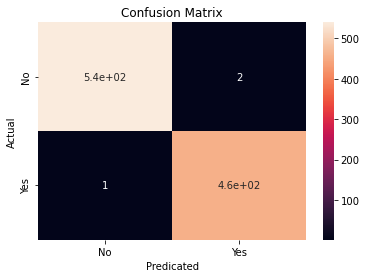

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicated');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No', 'Yes']);

In [33]:
# save models

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [34]:
from keras.models import model_from_json

In [35]:
# serialize model to json
json_model = model.to_json()

# save model architecture to JSON file
with open('creditscore_model.json', 'w') as json_file:
    json_file.write(json_model)
    
# saving weights of the model
model.save_weights('creditscore_weights.h5')




In [36]:
# load json and create model
json_file = open('creditscore_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("creditscore_weights.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 99.70%


In [37]:
score

[0.01889108121395111, 0.996999979019165]

In [38]:
input_vec= [phoneNumber,age, gender]
input_vec
 

NameError: name 'phoneNumber' is not defined

In [ ]:
col_names=['phoneNumber', 'age', 'gender']
col_names

In [ ]:
cols_to_scale = [[age,tenure,deviceOwned, numCalls, numSMS, dataUsage,monthlyFee,totalFee,overduePay, 
                        barSuspend, creditScore]]
        scaler = MinMaxScaler()
        cols=scaler.fit_transform(cols_to_scale)